In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import pywt
from pywt import wavedec, wavedec2
from pywt import waverec, waverecn

In [2]:
file = pd.read_csv('PV.csv',sep =';',decimal=',')
file.columns
file['DATE'] = pd.to_datetime(file["DATE"])

In [3]:
d = file.set_index('DATE')
a = d.pivot(columns='INV',values=['Prod','Pred_self','Pred_neighbour','IRRADIANCE'])

In [4]:
b = a.swaplevel(axis=1).sort_index(by="INV", axis=1)
b.head()


/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


INV                 PVT01.INV01                                        \
                           Prod IRRADIANCE   Pred_self Pred_neighbour   
DATE                                                                    
2018-06-07 16:50:00      695.58      919.0  690.317974     693.949980   
2018-06-08 07:00:00       25.42       35.7   44.702792      25.197383   
2018-06-08 07:10:00       22.74       41.6   49.015177      22.440701   
2018-06-08 07:20:00       28.04       67.8   68.165090      28.381391   
2018-06-08 07:30:00       39.20       91.7   85.633903      40.430942   

INV                 PVT01.INV02                                        \
                           Prod IRRADIANCE Pred_neighbour   Pred_self   
DATE                                                                    
2018-06-07 16:50:00      700.76      919.0     699.117278  695.636722   
2018-06-08 07:00:00       26.06       35.7      25.676702   45.321540   
2018-06-08 07:10:00       22.50       41.6      23.666146   49.665318   
2018-06-08 07:20:00       27.16       67.8      30.289965   68.954640   
2018-06-08 07:30:00       37.90       91.7      42.864158   86.550624   

INV                 PVT02.INV01                   ...        PVT03.INV02  \
                           Prod Pred_neighbour    ...     Pred_neighbour   
DATE                                              ...                      
2018-06-07 16:50:00      699.75     703.557104    ...         693.344689   
2018-06-08 07:00:00       28.01      28.975557    ...          25.703295   
2018-06-08 07:10:00       27.66      27.303469    ...          24.474918   
2018-06-08 07:20:00       37.20      35.258871    ...          33.084980   
2018-06-08 07:30:00       52.75      49.044720    ...          48.519347   

INV                             PVT04.INV01                                    \
                      Pred_self   Pred_self IRRADIANCE    Prod Pred_neighbour   
DATE                                                                            
2018-06-07 16:50:00  690.285465  700.062286      919.0  698.44     702.896448   
2018-06-08 07:00:00   45.353103   48.517991       35.7   26.88      26.624994   
2018-06-08 07:10:00   49.660927   52.869979       41.6   24.30      27.513785   
2018-06-08 07:20:00   68.790586   72.195758       67.8   32.45      38.389392   
2018-06-08 07:30:00   86.240924   89.824999       91.7   45.85      54.922159   

INV                 PVT04.INV02                                    
                      Pred_self    Prod Pred_neighbour IRRADIANCE  
DATE                                                               
2018-06-07 16:50:00  694.526840  699.30     693.766625      919.0  
2018-06-08 07:00:00   47.114699   25.40      25.639479       35.7  
2018-06-08 07:10:00   51.439086   25.68      25.082466       41.6  
2018-06-08 07:20:00   70.642299   35.65      35.206111       67.8  
2018-06-08 07:30:00   88.159734   51.19      50.823989       91.7  

[5 rows x 32 columns]

In [5]:
#A faire fonction moving average +plot

# Exploration data

In [6]:
h = b.loc[:,'PVT01.INV02']
h.head()
h.describe()

,Prod,IRRADIANCE,Pred_neighbour,Pred_self
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,363.416327,479.605421,363.539933,372.139648
std,244.397016,329.645665,242.709155,242.696231
min,0.000000,0.000000,-0.843619,19.037998
25%,118.772500,161.175000,121.865605,137.700457
50%,374.700000,474.900000,376.614922,368.675358
75%,603.767500,782.625000,599.672278,595.232858
max,704.190000,1192.100000,704.768526,896.702132


In [7]:
h.corr()

,Prod,IRRADIANCE,Pred_neighbour,Pred_self
Prod,1.000000,0.987720,0.999098,0.987720
IRRADIANCE,0.987720,1.000000,0.990524,1.000000
Pred_neighbour,0.999098,0.990524,1.000000,0.990524
Pred_self,0.987720,1.000000,0.990524,1.000000


# Add columns residual on the data

In [8]:
h['residu_self'] = h['Prod'] -h['Pred_self']
h['residu_n'] = h['Prod'] -h['Pred_neighbour']
h

/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Prod,IRRADIANCE,Pred_neighbour,Pred_self,residu_self,residu_n
DATE,,,,,,
2018-06-07 16:50:00,700.76,919.0,699.117278,695.636722,5.123278,1.642722
2018-06-08 07:00:00,26.06,35.7,25.676702,45.321540,-19.261540,0.383298
2018-06-08 07:10:00,22.50,41.6,23.666146,49.665318,-27.165318,-1.166146
2018-06-08 07:20:00,27.16,67.8,30.289965,68.954640,-41.794640,-3.129965
2018-06-08 07:30:00,37.90,91.7,42.864158,86.550624,-48.650624,-4.964158
2018-06-08 07:40:00,53.81,112.1,59.764801,101.569791,-47.759791,-5.954801
2018-06-08 07:50:00,74.84,145.9,80.942382,126.454488,-51.614488,-6.102382
2018-06-08 08:00:00,100.10,180.2,105.678634,151.707302,-51.607302,-5.578634
2018-06-08 08:10:00,127.13,197.2,132.336538,164.223274,-37.093274,-5.206538


# Resampling 

h.resample('10T')
hresample = hresample.resample('10T').bfill()
hresample[:]

# Decomposition wavelet of the residual

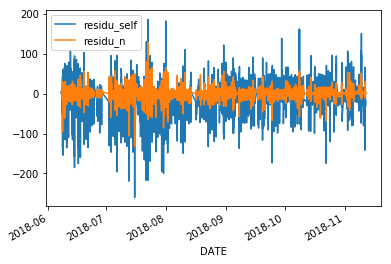

In [9]:
h[["residu_self","residu_n"]].plot()

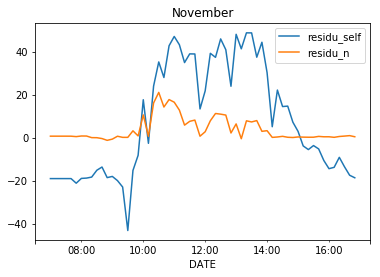

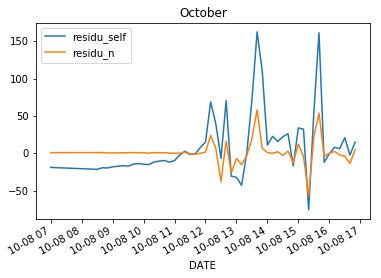

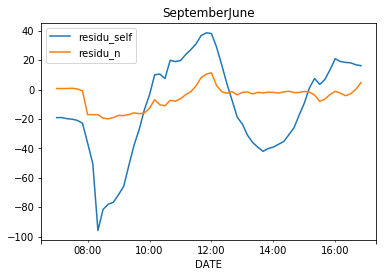

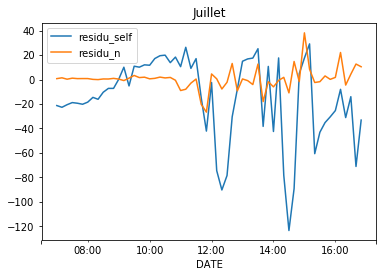

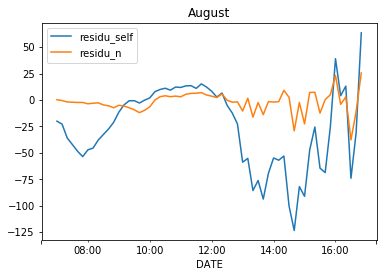

In [10]:
months=['November','October','September' 'June','Juillet','August']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
for i in range(len(months)):
    m=months[i]
    d=date[i]
    h[d:d][["residu_self","residu_n"]].plot()
    plt.title(m)

In [11]:
h['residu_self'].values

array([  5.12327794, -19.2615397 , -27.16531823, ..., -16.52708278,
       -20.59081259, -26.81531823])

# Wavelet decomposition

##### Some fct to plot the wavelet coeffs

In [12]:
def coef_pyramid_plot(coefs, first=0, scale='uniform', ax=None):
    
    
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, facecolor='lightgrey')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=16,
            position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

The coefficients ouput of the dwt are :
    1. The overall trend (low frequency)
    2. The details (high frequency)

In [13]:
#On 2 months
test = h['residu_self'].values[:24*1]

In [14]:
#pywt.dwt2(list(h['residu_self'].values), 'bior1.3')
cA, cD = pywt.dwt(list(h['residu_self'].values), 'db1')
cA, cD = pywt.dwt(list(test), 'db1')

In [15]:
len(h)

8640

Compute the details level at which we will decompose the signal

In [16]:
w = pywt.Wavelet('db1')
test = h['residu_self'].values[0:24*6*2]
level_d = pywt.dwt_max_level(len(test), w)

Decomposition 

### Number of level of the wavelet decomposition

In [17]:
#Choice of the wavelet : daube
w = pywt.Wavelet('db1')

In [18]:
#coeffs = wavedec((test), 'db1', level=level_d)
level_d_max = pywt.dwt_max_level(len(h[d:d][["residu_self"]]), w)
level_d

8

### Different levels of the decomposition

In [30]:
len(coeffs)

9

/home/karine/anaconda3/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


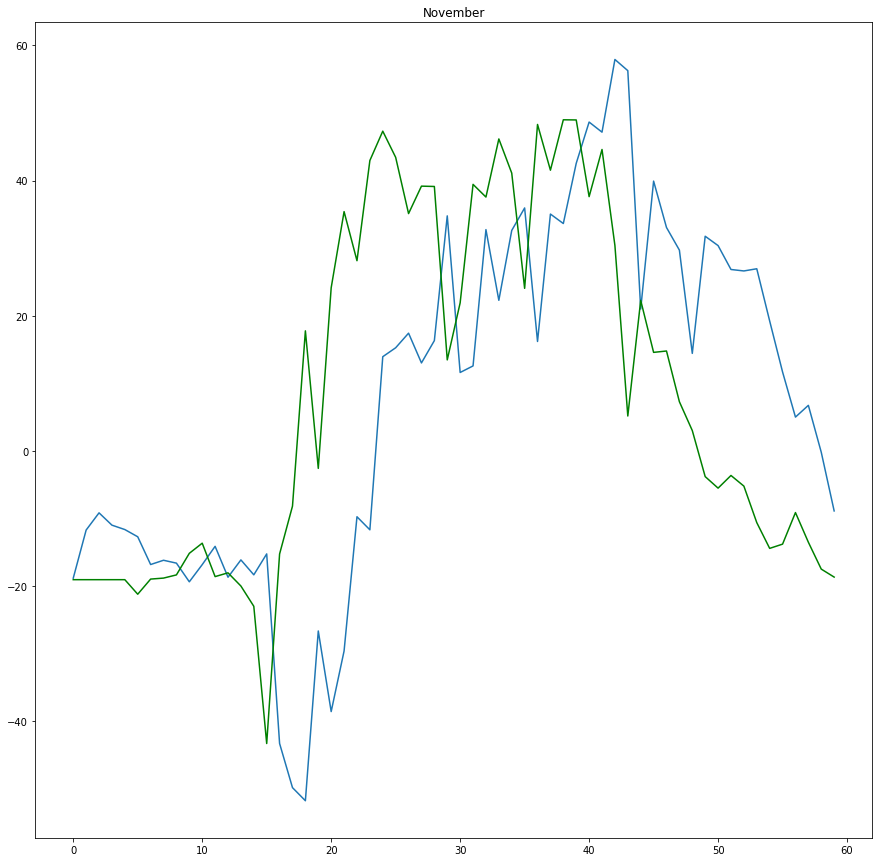

In [36]:
months=['November']
date=["2018-11-08"]
color=['r','m','y','b','pink']
fig = plt.figure(figsize=(15,15))
res = []
for i in range(len(months)):
    #plt.subplot(int(len(months))/2,len(months)-int(len(months))/2, i+1)
    m=months[i] 
    d=date[i]
    plt.title(m)
    #ca, cd = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d) #dwt
    #cam_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    #plt.plot(list(h[d:d]["residu_self"]),'g',label='original signal')
    coeffs = wavedec(list(h[d:d]["residu_self"]), 'db1', level=8)
    
#cA4, cD4, cD3, cD2 , cD1 = coeffs

#blocks_rec=pywt.waverec(coeffs, 'db1')

plt.plot(waverec(coeffs,'db2','per'))  
#plt.legend()
#plt.subplot(3,2,5)
plt.plot(list(h[d:d]["residu_self"]),'g',label='original signal')


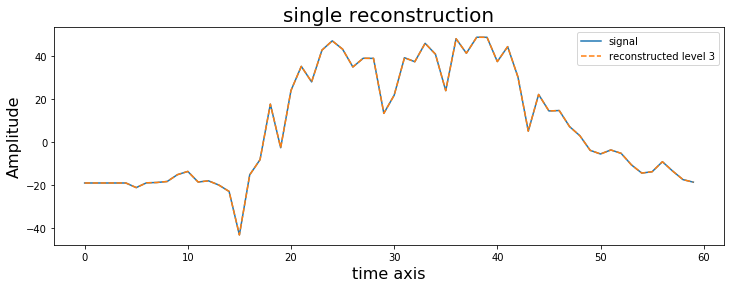

In [41]:
(cA1, cD1) = pywt.dwt(list(h[d:d]["residu_self"]), 'db2')
(cA2, cD2) = pywt.dwt(cA1, 'db2')
(cA3, cD3) = pywt.dwt(cA2, 'db2', 'smooth')
(cA4, cD4) = pywt.dwt(cA3, 'db2', 'smooth')
(cA5, cD5) = pywt.dwt(cA4, 'db2', 'smooth')

coefficients_level1 = [cA1, cD1]
coefficients_level2 = [cA2, cD2, cD1]
coefficients_level3 = [cA3, cD3, cD2, cD1]
coefficients_level4 = [cA4, cD4, cD3, cD2, cD1]
coefficients_level5 = [cA5, cD5, cD4, cD3, cD2, cD1]

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, 'db2', 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, 'db2', 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, 'db2', 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, 'db2', 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(list(h[d:d]["residu_self"]), label='signal')
#ax.plot(reconstructed_signal_level1, label='reconstructed level 1', linestyle='--')
#ax.plot(reconstructed_signal_level2, label='reconstructed level 2', linestyle='--')
ax.plot(reconstructed_signal_level3, label='reconstructed level 3', linestyle='--')
#ax.plot(reconstructed_signal_level4, label='reconstructed level 4', linestyle='--')
#ax.plot(reconstructed_signal_level5, label='reconstructed level 5', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('single reconstruction', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


/home/karine/anaconda3/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


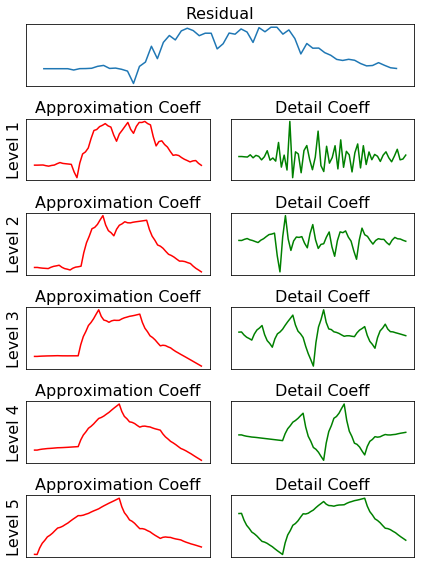

In [49]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b],[ax5a, ax5b]])

time = np.linspace(0, 1, num=2048)


chirp_signal = list(h[d:d]["residu_self"])
# First we reconstruct a signal using pywt.wavedec() as we have also done at #4.2
coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients. Below we assign these list of coefficients to variables explicitely.
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

# Since the the list of coefficients have been assigned explicitely to variables, we can set a few of them to zero.
approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstrucing the signal back from only one set of coefficients, we can see how 
# the frequency-sub band for that specific set of coefficient looks like
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')


ax0.set_title("Residual", fontsize=16)
ax0.plot( chirp_signal)
ax0.set_xticks([])
ax0.set_yticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')

for ii in range(0,5):
    axarr[ii,0].set_xticks([])
    axarr[ii,0].set_yticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,1].set_yticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)

plt.tight_layout()
plt.savefig("residual_decomposition.png")
plt.show()


#### Coefficients 

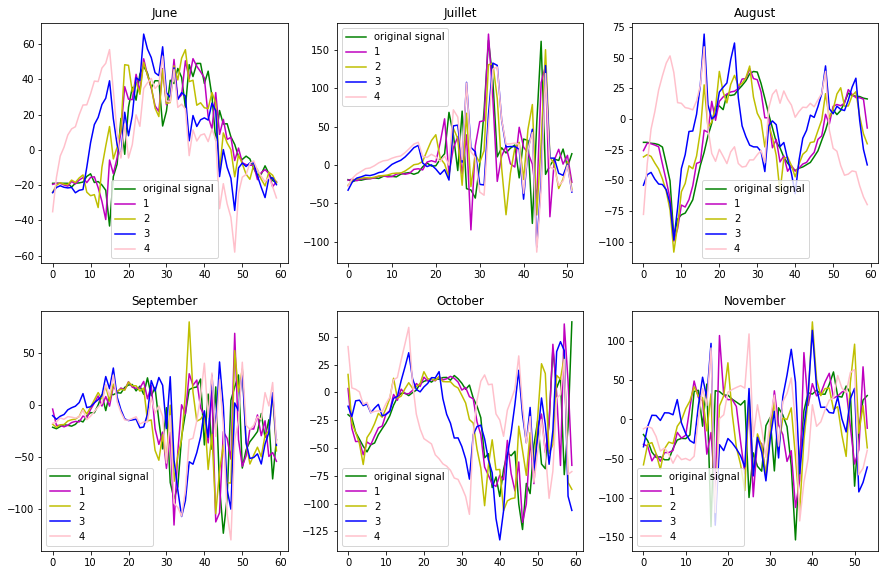

In [19]:
months=['June','Juillet','August','September','October','November']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
color=['r','m','y','b','pink']
fig = plt.figure(figsize=(15,15))
res = []
for i in range(len(months)):
    plt.subplot(int(len(months))/2,len(months)-int(len(months))/2, i+1)
    m=months[i] 
    d=date[i]
    plt.title(m)
    #ca, cd = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d) #dwt
    #cam_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    plt.plot(list(h[d:d]["residu_self"]),'g',label='original signal')
    for k in range(1,level_d_max):    
        coeffs = wavedec(list(h[d:d]["residu_self"]), 'db1', level=k)
        plt.plot(waverec(coeffs[:],'db2','per'),label=k, c=color[k])  
        plt.legend()
        

    

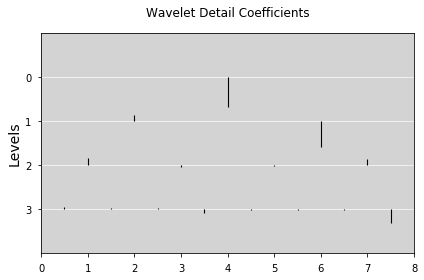

In [20]:
fig = coef_pyramid_plot(coeffs[1:]) ;
plt.title("Wavelet Detail Coefficients");

fig.tight_layout()

plt.show()

#### Reconstruction of the signal at different level of decomposition

In [ ]:
months=['June','Juillet','August','September','October','November']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
for i in range(len(months)):
    m=months[i]
    d=date[i]
    coeffs = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d)
    #ca, cd = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d) #dwt
    fig = plt.figure(figsize=(15,15))
    #cam_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    for k in range(1,level_d):
        plt.subplot(int(level_d/2),int(level_d)-(level_d/2),k)
        plt.title(m)
        plt.stem(coeffs[k],label="Level decompostion : " + str(k))
        plt.legend()
        

In [ ]:
months=['June','Juillet','August','September','October','November']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
for i in range(len(months)):
    m=months[i]
    d=date[i]
    coeffs = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d)
    fig = plt.figure(figsize=(15,15))
   
    for k in range(1,level_d):
        plt.subplot(int(level_d/2),int(level_d)-(level_d/2),k)
        plt.title(m)
        plt.plot(coeffs[k],label="Level decompostion : " + str(k))
        plt.legend()
        
    

# Moving average over one day on the full data

In [ ]:
h = b.loc[:,'PVT02.INV02']
h.head()
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
sol_avg = irrpd.rolling(window , win_type='triang').sum()


In [ ]:
plt.figure(figsize=(15,15))
h = b.loc[:,'PVT03.INV02']
plt.subplot(221)
sol_avg[6*24:].plot()

plt.subplot(222)
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod,label='prod')



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred,label='pred')
plt.legend()

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(221)
# A vérifier downsampling, upscaling
h = b.loc[:,'PVT02.INV02']
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(irrpd.values, window, 'same')
plt.plot(solar_rad_avg)



In [ ]:
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod)



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred)

In [ ]:
h = b.loc[:,'PVT02.INV02']
b.columns
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)

test = pd.to_numeric(b.loc[:,'PVT02.INV02']['IRRADIANCE']).values[:1000]
pd.DataFrame(test).head()
h.head()

## Test visualisation over few month 

In [ ]:
plt.plot(test)

## Convolution over a time period equal to a day

In [ ]:
# Moving average
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(test, window, 'same')

In [ ]:
plt.plot(list(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values))
plt.show()
plt.savefig("test.png")

In [ ]:
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)